In [1]:
import torch
from skimage import io
from skimage import io
import matplotlib.pyplot as plt
import cv2

from tqdm import tqdm

%matplotlib inline

In [19]:
from google.colab.patches import cv2_imshow # for image display


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
if torch.cuda.is_available(): 
   !nvidia-smi
   device = 'cuda' 
else: 
   device = 'cpu' 

device

Thu Feb 17 07:46:08 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    29W / 149W |      3MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

'cuda'

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s').to(device)  # or yolov5m, yolov5l, yolov5x, custom

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13

requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2022-2-17 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)



  0%|          | 0.00/14.0M [00:00<?, ?B/s]

Fusing layers... 


Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [8]:
Path      = "archive/"
Path      = "/content/drive/MyDrive/152_478_AI_2564_2/video_data/"    
filename  = "WADADA .mp4"


print(Path+filename)

/content/drive/MyDrive/152_478_AI_2564_2/video_data/WADADA .mp4


In [13]:
# capture the video
cap = cv2.VideoCapture(Path+filename)

# check if capture was successful
if not cap.isOpened(): 
    print("Could not open!")
else:
    print("Video read successful!")
    
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    width        = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height       = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps          = cap.get(cv2.CAP_PROP_FPS)
    
    print('Total frames: ' + str(total_frames))
    print('width: ' + str(width))
    print('height: ' + str(height))
    print('fps: ' + str(fps))

Video read successful!
Total frames: 7672
width: 854
height: 480
fps: 29.97


  0%|          | 0/400 [00:00<?, ?it/s]

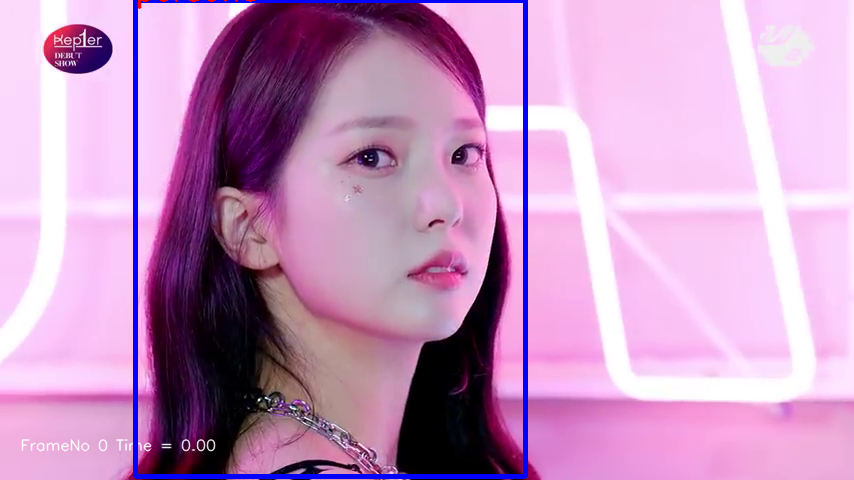

  9%|▉         | 35/400 [00:07<01:23,  4.36it/s]

In [ ]:
savepath = ""
savepath = "/content/drive/MyDrive/152_478_AI_2564_2/video_data/"
savefile = 'yolo_output.mp4'

fourcc = cv2.VideoWriter_fourcc(*'MP4V')
out    = cv2.VideoWriter(savepath+savefile, fourcc, fps, (width,height))
    


cap = cv2.VideoCapture(Path+filename)


for i in tqdm(range(800,1200)):

    cap.set(cv2.CAP_PROP_POS_FRAMES, i)    

   # Get the next frame, but don't decode if we're not using it.
    success    = cap.grab()

    ret, image = cap.retrieve()

  

    if  ret :

      duration = (i-800)/fps
      text = f"FrameNo {i-800} Time = {duration:.2f}"

      start_point = (20,height-30)
      image = cv2.putText(image, text, start_point, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA, False)
      


    
      results = model(image)
      Dictdata =  results.pandas().xyxy[0].to_dict('index')
      
      color     = (255, 0, 0)
      thickness = 3

      for key, x in Dictdata.items():
        if x['name'] != None :
            start_point = ( int(x['xmin']), int(x['ymin']) )
            end_point   = ( int(x['xmax']), int(x['ymax']) )
            image = cv2.rectangle(image, start_point, end_point, color, thickness)
            text = x['name']+str(key)
            image = cv2.putText(image, text, start_point, cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA, False)
            out.write(image)

        if i% 100 ==0  :
           cv2_imshow(image)
      


out.release()      
cap.release()
